Michał Wiśniewski 418486

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def P_x(k):
    if k == 0:
        return 0.5
    return 1 / (4 * abs(k) * (abs(k) + 1))

 * Argue that these formulas indeed describe a discrete distribution.

For $k \neq 0$: $P(X=k) = \frac{1}{4|k|(|k|+1)} = \frac{1}{4}(\frac{1}{|k|}-\frac{1}{|k|+1})$  
X is discrete, so it has values that are integers. But there are absolute values so (assuming 0 is not natural):  
$\sum_{k \in Z-\{0\}}P(X=k)=\sum_{k \in Z-\{0\}}\frac{1}{4}(\frac{1}{|k|}-\frac{1}{|k|+1}) = \sum_{k \in N}2\cdot\frac{1}{4}(\frac{1}{k}-\frac{1}{k+1})$  
Therefore:  
$\sum^\infty_{k = 1}2\cdot\frac{1}{4}(\frac{1}{k}-\frac{1}{k+1})=\frac{1}{2}\sum^\infty_{k = 1}(\frac{1}{k}-\frac{1}{k+1}) = \frac{1}{2}$  
so  
$\sum_{k \in Z}P(X=k) = \sum_{k \in Z-\{0\}}(P(X=k)) + P(X=0) = \frac{1}{2} + \frac{1}{2} = 1$  
Therefore these formulas indeed describe a discrete distribution (because events sum to 1)

 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.

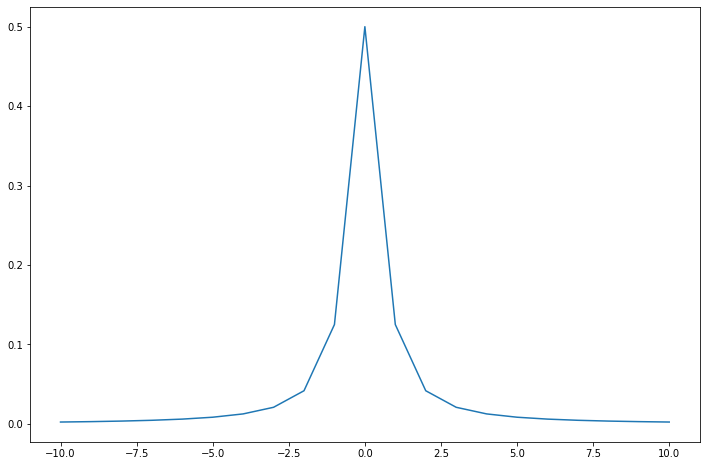

In [3]:
plt.figure(figsize=(12,8))
plt.plot([k for k in range(-10, 11)], [P_x(k) for k in range(-10, 11)])

 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).

In [4]:
# P(X=k) for natural numbers and zero, it is later chosen
# whether value is negative or positive
def P_x_natural(k):
    if k == 0:
        return P_x(k)
    return 2*P_x(k)

sums = [P_x_natural(0)]

def find_interval(u):
    left, right = 0, sums[0]
    if left <= u and u <= right:
        return 0
    k = 1
    while True:
        if len(sums) == k: # update prefix sums
            sums.append(sums[k-1] + P_x_natural(k))
            
        left, right = sums[k-1], sums[k]
        if left <= u and u <= right:
            return k
        k += 1
        
def simulate():
    u = np.random.uniform()
    # Probability is counted for natural numbers only, so it is 
    # chosen whether number is negative or positive
    return np.random.choice([1, -1]) * find_interval(u)

In [5]:
simulate()

-2

 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.

In [6]:
N = 10000
vals = [simulate() for i in range(N)]

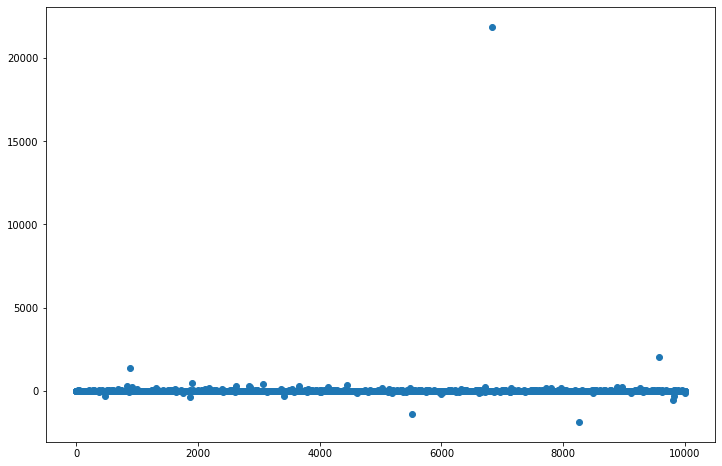

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(np.arange(1, len(vals)+1), vals)

 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 

In [8]:
avgs = np.cumsum(vals).astype(np.float32) / np.arange(1, N + 1)

 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.

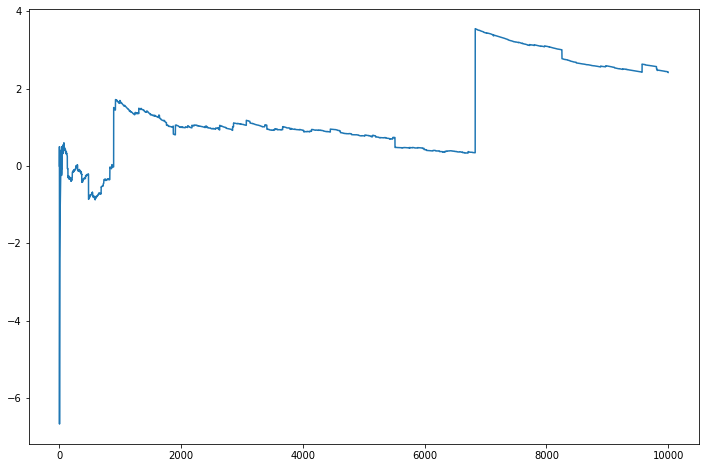

In [9]:
plt.figure(figsize=(12,8))
plt.plot(avgs)

 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).

In [10]:
medians = []
for i in range(1, N+1):
    sub_vals = sorted(vals[:i])
    if len(sub_vals) % 2 == 0:
        medians.append(((sub_vals[i//2])+(sub_vals[(i-1)//2]))/2)
    else:
        medians.append(sub_vals[i//2])


 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 

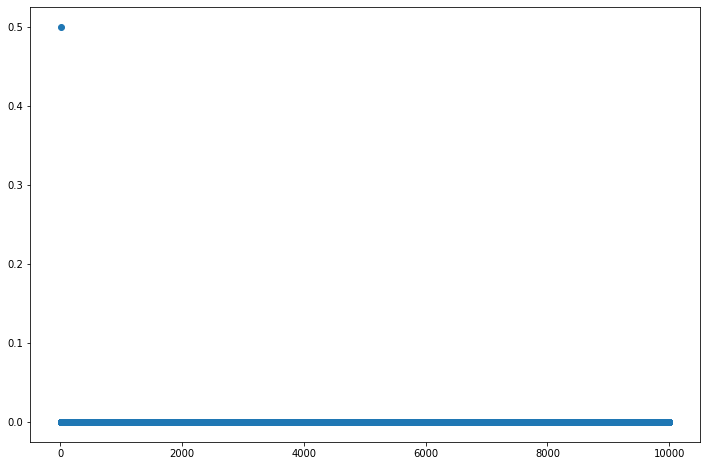

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(np.arange(1, N+1), medians)

 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

Computing median works better